In [2]:
!pip install face_recognition

Done learning and creating profiles
enter 
 1 for marking attendance 
 2 for exit
1

 [INFO] Initializing face capture. Look the camera and wait ...
welcome!  Vijay Gottipati


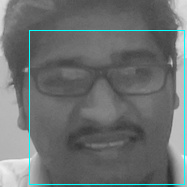

enter 
 1 for marking attendance 
 2 for exit
2
exiting


In [1]:
 import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
import cv2
from cv2 import imshow
import os
import face_recognition
from datetime import datetime
import time as t

face_1 = face_recognition.load_image_file("vijay.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("nirbhaya.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("kanishkha.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding
]
known_face_names = [
    "Vijay Gottipati",
    "Nirbhaya Reddy",
    "J.Kanishkha"
]
print("Done learning and creating profiles")


if not os.path.exists('image'):
    os.makedirs('image')
a=(int)(input("enter \n 1 for marking attendance \n 2 for exit\n"))
if a!=1:
    print("exiting")
while(a==1):
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    cam = cv2.VideoCapture(0)
    cam.set(3,640)
    cam.set(4,480)
    count = 0
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    print("\n [INFO] Initializing face capture. Look the camera and wait ...")
   
    while(True):
        t.sleep(2)
        ret, img = cam.read()

        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
            count += 1
            cv2.imwrite("Users.jpg", gray[y:y+h,x:x+w])
            cv2.imshow('image', img)
        k = cv2.waitKey(300) & 0xff
        if k < 2:
            break
        elif count >= 1:
             break
    t.sleep(2)
    cam.release()
    cv2.destroyAllWindows()
    now = datetime.now()
    dtString = now.strftime('%d-%b-%Y')    
    if not os.path.exists('attendance_list'+dtString+'.csv'):
        #os.makedirs('attendance_list'+dtString+'.csv')
        with open('attendance_list'+dtString+'.csv', 'w') as f:
            f.writelines(f'\n   Name,Date,Time')
            f.close()
    def makeAttendanceEntry(name):
        now = datetime.now()
        dtString = now.strftime('%d-%b-%Y')
        with open('attendance_list'+dtString+'.csv','r+') as f:
            allLines = f.readlines()
            attendanceList = []
            for line in allLines:
                entry = line.split(',')
                attendanceList.append(entry[0])
            if (name not in attendanceList):
                now = datetime.now()
                dtString = now.strftime('%d/%b/%Y, %H:%M:%S') 
                f.writelines(f'\n{name},{dtString}')


    file_name = "Users.jpg"
    unknown_image = face_recognition.load_image_file(file_name)
    unknown_image_to_draw = cv2.imread(file_name)

    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    pil_image = Image.fromarray(unknown_image)
    draw = ImageDraw.Draw(pil_image)
    name="Unknown"
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
        cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
        cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
        makeAttendanceEntry(name)
    if name=="Unknown":
        print(name)
    else:
        print("welcome!  "+name)
    display(pil_image)
    #cv2.imshow('image',unknown_image_to_draw)
    a=(int)(input("enter \n 1 for marking attendance \n 2 for exit\n"))
    if a!=1:
        print("exiting")